In [1]:
import model_utils as mu
mu.DEATH_RATE = 0.36
mu.ICU_RATE = 0.78
mu.HOSPITAL_RATE = 2.18
mu.SYMPTOM_RATE = 10.2
mu.INFECT_2_HOSPITAL_TIME = 11
mu.HOSPITAL_2_ICU_TIME = 4
mu.ICU_2_DEATH_TIME = 4
mu.ICU_2_RECOVER_TIME = 7
mu.NOT_ICU_DISCHARGE_TIME = 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
daily_metrics, cum_metrics, model_beta = mu.get_metrics_by_country('Iraq', lockdown_date='20200322', relax_date='20200411')

NumExpr defaulting to 4 threads.
C:\Users\Quoc\bitbucket\covid-19\prognosis\model_utils.py:263: RuntimeWarning: divide by zero encountered in log
  log_daily_death = np.log(daily_local_death_new)


In [5]:
import plotly.offline as py_offline
import cufflinks as cf
cf.go_offline()
py_offline.__PLOTLY_OFFLINE_INITIALIZED = True

In [6]:
daily_metrics.iplot()

In [7]:
import SEIR

In [8]:
Infected = (100/mu.DEATH_RATE)*daily_metrics.death

In [9]:
 relax_date='20200511'

In [10]:
Cases = Infected.cumsum()
Cases = Cases[Cases.index>=relax_date].dropna()


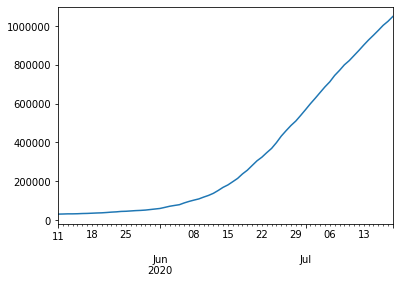

In [11]:
Cases.dropna().plot()

In [12]:
start_date ='20200420'

In [13]:
C = np.array(Cases.iloc[:])
N = 38430000 # the population of Iraq
#SEIR.N = 38430000 # the population of Iraq
r0 = cum_metrics.infected[start_date]
i0=C[0]-r0
I0 = [i0] 
E0 = i0 * range(6)

In [14]:
i0

3786.10230978666

In [15]:
C[0]

29999.999999999978

In [16]:
len(C)

70

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.



(0.0, 3786.10230978666, 368959960.33579236)
(3786.10230978666, 3786.10230978666, 368959960.33579236)
(7572.20461957332, 3786.10230978666, 368959960.33579236)
(11358.30692935998, 3786.10230978666, 368959960.33579236)


C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp



(15144.40923914664, 3786.10230978666, 368959960.33579236)
(18930.5115489333, 3786.10230978666, 368959960.33579236)


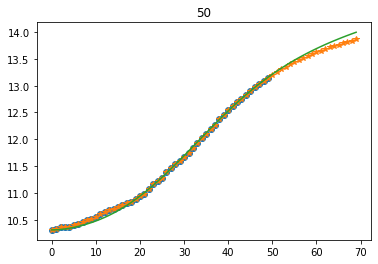

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



(0.0, 3786.10230978666, 584580674.9330238)
(3786.10230978666, 3786.10230978666, 584580674.9330238)
(7572.20461957332, 3786.10230978666, 584580674.9330238)
(11358.30692935998, 3786.10230978666, 578133872.9776949)
(15144.40923914664, 3786.10230978666, 578133872.9776949)
(18930.5115489333, 3786.10230978666, 578133872.9776949)


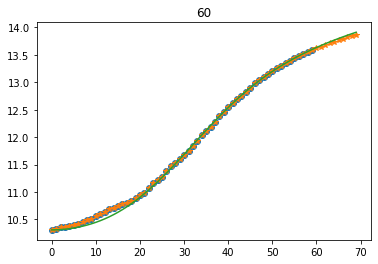

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\Quoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.

C:\Users\Quoc\bitbucket\covid-19\prognosis\SEIR.py:20: RuntimeWarning:

overflow encountered in exp



(0.0, 3786.10230978666, 2158687882.3080583)
(3786.10230978666, 3786.10230978666, 2158687882.3080583)
(7572.20461957332, 3786.10230978666, 2158687882.3080583)
(11358.30692935998, 3786.10230978666, 2158687882.3080583)
(15144.40923914664, 3786.10230978666, 2158687882.3080583)
(18930.5115489333, 3786.10230978666, 2158687882.3080583)


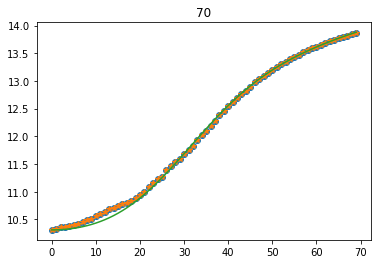

In [18]:

for n_data_point in [50,60, 70]:
    Cpast = C[0:n_data_point]

    best = np.inf
    res = (0, 0, 0)
    t = np.arange(len(Cpast))

    for e0 in E0:
        for i0 in I0:    
            y0 = [N-e0-i0-r0, e0, i0, r0]
            opt, val = SEIR.minimization(y0, t, Cpast, N, 30)
            if (val < best):
                besty0 = y0
                res = opt
                best = val
            print((e0, i0, best))

    tau = np.arange(len(C))
    out_seir = SEIR.dynamics(besty0, tau, N, *res)
    fitted = out_seir[:,2]+out_seir[:,3]
    plt.plot(t, np.log(Cpast), 'o')
    plt.plot(tau, np.log(C), '*')
    plt.plot(tau, np.log(fitted))
    plt.title('{}'.format(n_data_point))
    plt.show()

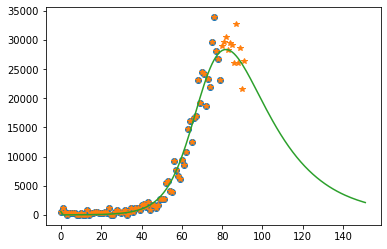

In [58]:
plt.plot(t, Ipast, 'o')
plt.plot(tau, I, '*')
plt.plot(tau, fitted)
plt.show()